In [30]:
import pandas as pd
import pickle


In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [34]:
def perform_inference():
    # Load the model
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Load the test data
    df = pd.read_csv('data/test.csv')

    # df_test = convert_to_numerical(test_data)

    features = ['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count',
       'Phys_Act', 'Time_E_Dev', 'Gender', 'H_Cal_Consump', 'Smoking',
       'Fam_Hist', 'H_Cal_Burn', 'Alcohol_Consump_Sometimes',
       'Alcohol_Consump_Frequently', 'Alcohol_Consump_Always',
       'Alcohol_Consump_no', 'Food_Between_Meals_Sometimes',
       'Food_Between_Meals_Frequently', 'Food_Between_Meals_no',
       'Food_Between_Meals_Always', 'Transport_Public_Transportation',
       'Transport_Motorbike', 'Transport_Bike', 'Transport_Automobile',
       'Transport_Walking']

    numerical_features = ['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count', 'Phys_Act', 'Time_E_Dev']
    df_numerical = pd.DataFrame()
    df_numerical[numerical_features] = df[numerical_features]
    df_numerical['Gender'] = df['Gender'].map({"Female" : 0, "Male" : 1})
    binary_categorical_features = ['H_Cal_Consump', 'Smoking', 'Fam_Hist', 'H_Cal_Burn'] # Yes or no
    for feature in binary_categorical_features:
        df_numerical[feature] = df[feature].map({"no" : 0, "yes" : 1})
    multi_categorical_features = ['Alcohol_Consump', 'Food_Between_Meals', 'Transport']
    for feature in multi_categorical_features:
        values = sorted(list(set(df[feature])))
        for value in values:
            df_numerical[feature+"_"+value] = df[feature].map(lambda x: 1 if x==value else 0)


    # An extra step done for the validation set since it may not contain all the categories of a specific attribute due to its smaller size.
    for feature in features:
        if feature not in list(df_numerical.columns.array):
            df_numerical[feature] = 0

    df_numerical = df_numerical.reindex(sorted(df_numerical.columns), axis=1)
    features = sorted(features)
    

    x_test = df_numerical[features]
    # print(x_test.columns)'
    y_test = df['Body_Level']
    # Make predictions
    preds = model.predict(x_test)

    return preds, y_test
    # # Save predictions to a text file
    # with open('preds.txt', 'w') as f:
    #     for pred in preds:
    #         f.write(str(pred) + '\n')

In [35]:
preds, y_test = perform_inference()

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

Body Level 1       1.00      1.00      1.00        14
Body Level 2       1.00      1.00      1.00        24
Body Level 3       0.98      1.00      0.99        42
Body Level 4       1.00      0.99      0.99        68

    accuracy                           0.99       148
   macro avg       0.99      1.00      1.00       148
weighted avg       0.99      0.99      0.99       148



In [44]:
# read from inference/preds.txt
import pandas as pd
import pickle
with open('./inference/preds.txt', 'r') as f:
    preds = f.readlines()

preds_read = [(pred.strip()) for pred in preds]

#compare with the actual labels
print(classification_report(y_test, preds_read))

              precision    recall  f1-score   support

Body Level 1       1.00      1.00      1.00        14
Body Level 2       1.00      1.00      1.00        24
Body Level 3       0.98      1.00      0.99        42
Body Level 4       1.00      0.99      0.99        68

    accuracy                           0.99       148
   macro avg       0.99      1.00      1.00       148
weighted avg       0.99      0.99      0.99       148



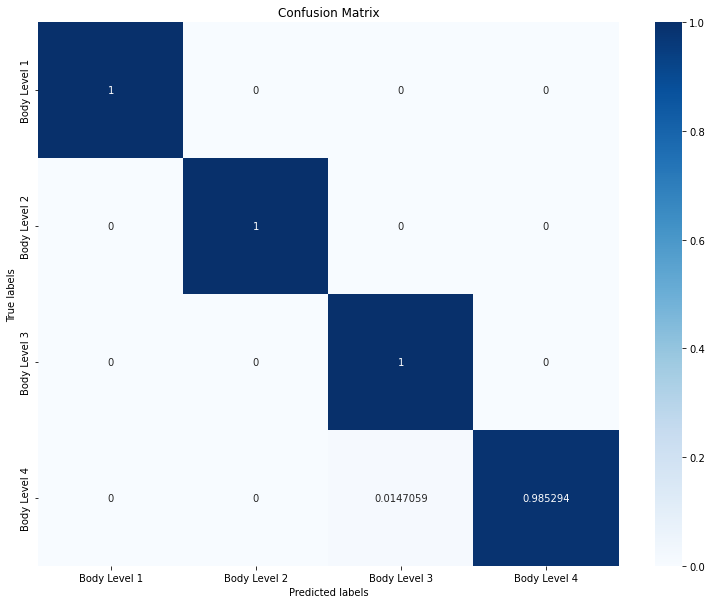

In [53]:
# print a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


labels = ['Body Level 1', 'Body Level 2', 'Body Level 3', 'Body Level 4']

# display the confusion matrix using percentages
cm = confusion_matrix(y_test, preds_read)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(13,10))

sns.heatmap(cmn, annot=True, ax = ax, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels); #annot=True to annotate cells
plt.xlabel('Predicted labels');
plt.ylabel('True labels');
plt.title('Confusion Matrix');
plt.show()


